# Bagging and Pasting
Decision Tree ensemble is trained on feature set 2

## Get the data 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict
from time import time
import pickle  
import sklearn
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

%store -r
%store

Stored variables and their in-db values:
X_16_val                  -> array([[ 0.10924883,  1.83030605, -0.14807631, ...
X_32_val                  -> array([[ 0.66944195,  0.46536115,  0.79919788, ...
X_32test_std              -> defaultdict(<class 'list'>, {0: array([[ 0.6694419
X_32train_std             -> array([[-0.74031227,  0.0126481 , -0.30967801, ...
X_test                    -> defaultdict(<class 'list'>, {0: array([[[ -6.40490
X_test_std                -> defaultdict(<class 'list'>, {0: array([[ 0.1092488
X_train                   -> array([[[ 0.00119031,  0.00873315,  0.00641749, ..
X_train_std               -> array([[-0.74031227,  0.0126481 , -0.30967801, ...
snrs                      -> [-20, -18, -16, -14, -12, -10, -8, -6, -4, -2, 0, 
y_16_val                  -> array([6, 6, 5, ..., 0, 4, 1])
y_32_test                 -> defaultdict(<class 'list'>, {0: array([2, 2, 4, ..
y_32_train                -> array([0, 3, 4, ..., 0, 3, 1])
y_32_val                  -> array([2, 

In [2]:
print("Training data: ", X_32train_std.shape, "and labels: ", y_32_train.shape)
print(" ")
print("Test data:")
print("Total", len(X_32test_std), X_32test_std[18].shape, "arrays for SNR values:")
print(X_32test_std.keys())

Training data:  (80000, 32) and labels:  (80000,)
 
Test data:
Total 20 (4000, 32) arrays for SNR values:
dict_keys([0, -16, 2, 4, 6, 8, 12, 10, -20, -14, -18, 16, 18, -12, 14, -10, -8, -6, -4, -2])


## Train and test the classifiers

In [3]:
#Train the classifier

bagg_clf = BaggingClassifier(DecisionTreeClassifier(), bootstrap=True, n_estimators=400, max_samples=100)
paste_clf = BaggingClassifier(DecisionTreeClassifier(), bootstrap=False, n_estimators=400, max_samples=100)

start = time()
bagg_clf.fit(X_32train_std, y_32_train)  
print("Bagging: training took %.2f seconds"%(time() - start))
print("BaggingClassifier:")
print(bagg_clf)

print(" ")

start = time()
paste_clf.fit(X_32train_std, y_32_train)  
print("Pasting: training took %.2f seconds"%(time() - start))
print("PastingClassifier:")
print(paste_clf)

Bagging: training took 18.12 seconds
BaggingClassifier:
BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=100, n_estimators=400, n_jobs=1, oob_score=False,
         random_state=None, verbose=0, warm_start=False)
 
Pasting: training took 18.26 seconds
PastingClassifier:
BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'

In [4]:
#Test the classifier

import collections

y_pred = defaultdict(list)
accuracy_bagg = defaultdict(list)

print("Test bagging classifier")
print(" ")
for snr in snrs:
    y_pred[snr] = bagg_clf.predict(X_32test_std[snr])
    accuracy_bagg[snr] = metrics.accuracy_score(y_32_test[snr], y_pred[snr])
    print("Accuracy on %d dB SNR samples = "%(snr), accuracy_bagg[snr])   
    
accuracy_bagg = collections.OrderedDict(sorted(accuracy_bagg.items()))  #sort by ascending SNR value

Test bagging classifier
 
Accuracy on -20 dB SNR samples =  0.118
Accuracy on -18 dB SNR samples =  0.13075
Accuracy on -16 dB SNR samples =  0.133
Accuracy on -14 dB SNR samples =  0.131
Accuracy on -12 dB SNR samples =  0.157
Accuracy on -10 dB SNR samples =  0.17975
Accuracy on -8 dB SNR samples =  0.245
Accuracy on -6 dB SNR samples =  0.3015
Accuracy on -4 dB SNR samples =  0.3405
Accuracy on -2 dB SNR samples =  0.3925
Accuracy on 0 dB SNR samples =  0.4735
Accuracy on 2 dB SNR samples =  0.61725
Accuracy on 4 dB SNR samples =  0.77425
Accuracy on 6 dB SNR samples =  0.80825
Accuracy on 8 dB SNR samples =  0.8065
Accuracy on 10 dB SNR samples =  0.81475
Accuracy on 12 dB SNR samples =  0.81075
Accuracy on 14 dB SNR samples =  0.81275
Accuracy on 16 dB SNR samples =  0.8075
Accuracy on 18 dB SNR samples =  0.81


In [5]:
#Test the classifier

import collections

y_pred = defaultdict(list)
accuracy_paste = defaultdict(list)

print("Test pasting classifier")
print(" ")
for snr in snrs:
    y_pred[snr] = paste_clf.predict(X_32test_std[snr])
    accuracy_paste[snr] = metrics.accuracy_score(y_32_test[snr], y_pred[snr])
    print("Accuracy on %d dB SNR samples = "%(snr), accuracy_paste[snr])   
    
accuracy_paste = collections.OrderedDict(sorted(accuracy_paste.items()))  #sort by ascending SNR value

Test pasting classifier
 
Accuracy on -20 dB SNR samples =  0.1265
Accuracy on -18 dB SNR samples =  0.1195
Accuracy on -16 dB SNR samples =  0.1285
Accuracy on -14 dB SNR samples =  0.12775
Accuracy on -12 dB SNR samples =  0.16075
Accuracy on -10 dB SNR samples =  0.18675
Accuracy on -8 dB SNR samples =  0.24425
Accuracy on -6 dB SNR samples =  0.2895
Accuracy on -4 dB SNR samples =  0.361
Accuracy on -2 dB SNR samples =  0.39125
Accuracy on 0 dB SNR samples =  0.457
Accuracy on 2 dB SNR samples =  0.605
Accuracy on 4 dB SNR samples =  0.783
Accuracy on 6 dB SNR samples =  0.817
Accuracy on 8 dB SNR samples =  0.81725
Accuracy on 10 dB SNR samples =  0.81625
Accuracy on 12 dB SNR samples =  0.824
Accuracy on 14 dB SNR samples =  0.8255
Accuracy on 16 dB SNR samples =  0.8185
Accuracy on 18 dB SNR samples =  0.81425


##  Visualize classifier performance

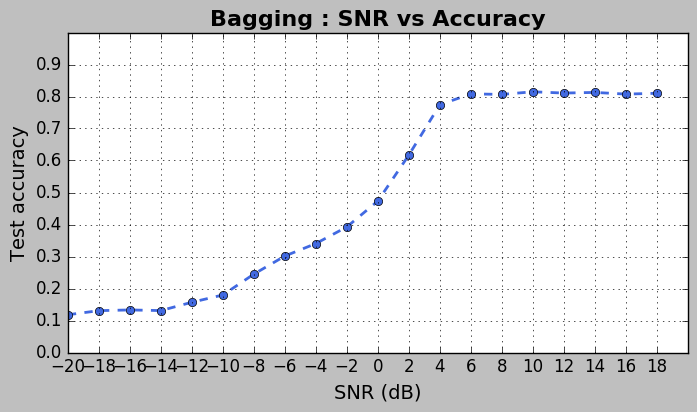

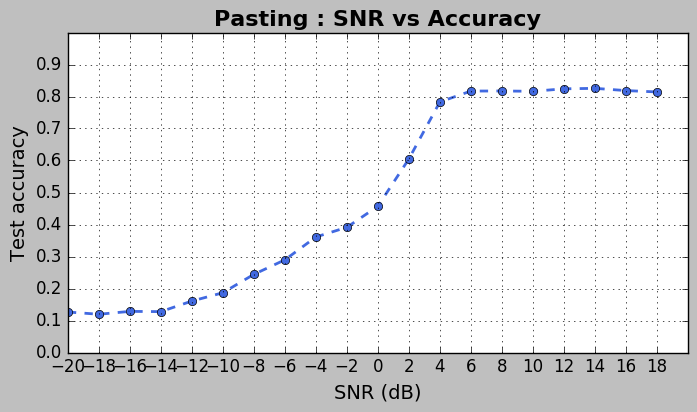

In [6]:
#Visualize the performance 

plt.style.use('classic')

fig = plt.figure(figsize=(8, 4), dpi=100)
x = snrs
y = list(accuracy_bagg.values())
plt.plot(x, y, marker="o", linewidth=2.0, linestyle='dashed', color='royalblue')
plt.axis([-20, 20, 0, 1])
plt.xticks(np.arange(min(x), max(x)+1, 2.0))
plt.yticks(np.arange(0, 1, 0.10))

ttl = plt.title('Bagging : SNR vs Accuracy', fontsize=16)
ttl.set_weight('bold')
plt.xlabel('SNR (dB)', fontsize=14)
plt.ylabel('Test accuracy', fontsize=14)
plt.grid()

plt.show()
#----------------------------------------------------------

plt.style.use('classic')

fig = plt.figure(figsize=(8, 4), dpi=100)
x = snrs
y = list(accuracy_paste.values())
plt.plot(x, y, marker="o", linewidth=2.0, linestyle='dashed', color='royalblue')
plt.axis([-20, 20, 0, 1])
plt.xticks(np.arange(min(x), max(x)+1, 2.0))
plt.yticks(np.arange(0, 1, 0.10))

ttl = plt.title('Pasting : SNR vs Accuracy', fontsize=16)
ttl.set_weight('bold')
plt.xlabel('SNR (dB)', fontsize=14)
plt.ylabel('Test accuracy', fontsize=14)
plt.grid()

plt.show()